In [26]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math

# Keras imports
from keras.models import Sequential
from keras.layers import Dense

# Here we import the LSTM cell which allows us to make LSTM cells
# Here is the documentation for the LSTM cell in Keras https://keras.io/layers/recurrent/#lstm
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.utils import check_array
from sklearn.metrics import mean_absolute_error


# We load our data using pandas

In [27]:
dataframe = pd.read_csv('UNRATE.csv')

In [28]:
dataframe.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [29]:
dataframe1 = dataframe[['UNRATE']] # the four columns are Open,High,Low and Close.
dataframe1.head()

,UNRATE
0,3.4
1,3.8
2,4.0
3,3.9
4,3.5


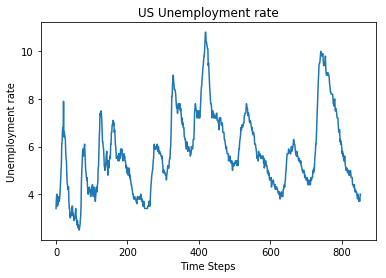

In [30]:
plt.plot(dataframe1[0:])
plt.title('US Unemployment rate')
plt.xlabel('Time Steps')
plt.ylabel('Unemployment rate')
#plt.legend()
plt.savefig("Plot Of Unemployment rate.eps", format='eps', dpi=1000)
plt.show()

### WE NORMALISE OUR DATA

In [31]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataframe1 = scaler.fit_transform(dataframe1)

In [32]:
dataframe1[0:5]

array([[0.10843373],
       [0.15662651],
       [0.18072289],
       [0.1686747 ],
       [0.12048193]])

## We create labels for our datasets.

In [33]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [34]:
dataX,dataY=create_dataset(dataframe1,look_back=1)

## We split our dataset using 70 percent for training and 30 percent for testing.

In [35]:
train_size = int(len(dataframe1) * 0.7)
test_size = len(dataframe1) - train_size
train, test = dataframe1[0:train_size,:], dataframe1[train_size:len(dataframe1),:]

In [36]:
look_back = 12 # window size of 12.

# Split the data into training features and training targets
trainX, trainY = create_dataset(train, look_back)

# Split the data into testing features and testing targets
testX, testY = create_dataset(test, look_back)

In [37]:
dataframe1[0:15]

array([[0.10843373],
       [0.15662651],
       [0.18072289],
       [0.1686747 ],
       [0.12048193],
       [0.13253012],
       [0.13253012],
       [0.1686747 ],
       [0.15662651],
       [0.14457831],
       [0.15662651],
       [0.18072289],
       [0.21686747],
       [0.26506024],
       [0.30120482]])

In [38]:
trainX[0:6]

array([[0.10843373, 0.15662651, 0.18072289, 0.1686747 , 0.12048193,
        0.13253012, 0.13253012, 0.1686747 , 0.15662651, 0.14457831,
        0.15662651, 0.18072289],
       [0.15662651, 0.18072289, 0.1686747 , 0.12048193, 0.13253012,
        0.13253012, 0.1686747 , 0.15662651, 0.14457831, 0.15662651,
        0.18072289, 0.21686747],
       [0.18072289, 0.1686747 , 0.12048193, 0.13253012, 0.13253012,
        0.1686747 , 0.15662651, 0.14457831, 0.15662651, 0.18072289,
        0.21686747, 0.26506024],
       [0.1686747 , 0.12048193, 0.13253012, 0.13253012, 0.1686747 ,
        0.15662651, 0.14457831, 0.15662651, 0.18072289, 0.21686747,
        0.26506024, 0.30120482],
       [0.12048193, 0.13253012, 0.13253012, 0.1686747 , 0.15662651,
        0.14457831, 0.15662651, 0.18072289, 0.21686747, 0.26506024,
        0.30120482, 0.3373494 ],
       [0.13253012, 0.13253012, 0.1686747 , 0.15662651, 0.14457831,
        0.15662651, 0.18072289, 0.21686747, 0.26506024, 0.30120482,
        0.3373494 ,

In [39]:
trainY[0:6]

array([0.21686747, 0.26506024, 0.30120482, 0.3373494 , 0.43373494,
       0.44578313])

In [40]:
testX[0]

array([0.26506024, 0.25301205, 0.26506024, 0.25301205, 0.25301205,
       0.26506024, 0.21686747, 0.22891566, 0.24096386, 0.24096386,
       0.24096386, 0.25301205])

In [41]:
trainY[0]

0.216867469879518

In [42]:
print('Train X shape ',trainX.shape)
print('Train Y shape',trainY.shape)
print('Test X shape ',testX.shape)
print('Test Y shape ',testY.shape)

Train X shape  (584, 12)
Train Y shape (584,)
Test X shape  (243, 12)
Test Y shape  (243,)


In [43]:
dataframe1.shape

(853, 1)

In [44]:
testX[0:6]

array([[0.26506024, 0.25301205, 0.26506024, 0.25301205, 0.25301205,
        0.26506024, 0.21686747, 0.22891566, 0.24096386, 0.24096386,
        0.24096386, 0.25301205],
       [0.25301205, 0.26506024, 0.25301205, 0.25301205, 0.26506024,
        0.21686747, 0.22891566, 0.24096386, 0.24096386, 0.24096386,
        0.25301205, 0.24096386],
       [0.26506024, 0.25301205, 0.25301205, 0.26506024, 0.21686747,
        0.22891566, 0.24096386, 0.24096386, 0.24096386, 0.25301205,
        0.24096386, 0.22891566],
       [0.25301205, 0.25301205, 0.26506024, 0.21686747, 0.22891566,
        0.24096386, 0.24096386, 0.24096386, 0.25301205, 0.24096386,
        0.22891566, 0.22891566],
       [0.25301205, 0.26506024, 0.21686747, 0.22891566, 0.24096386,
        0.24096386, 0.24096386, 0.25301205, 0.24096386, 0.22891566,
        0.22891566, 0.21686747],
       [0.26506024, 0.21686747, 0.22891566, 0.24096386, 0.24096386,
        0.24096386, 0.25301205, 0.24096386, 0.22891566, 0.22891566,
        0.21686747,

In [45]:
testY[0:6]

array([0.24096386, 0.22891566, 0.22891566, 0.21686747, 0.22891566,
       0.20481928])

## We reshape our data

In [46]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [47]:
print('Train X shape ',trainX.shape)
print('Train Y shape',trainY.shape)
print('Test X shape ',testX.shape)
print('Test Y shape ',testY.shape)

Train X shape  (584, 12, 1)
Train Y shape (584,)
Test X shape  (243, 12, 1)
Test Y shape  (243,)


In [48]:
model = Sequential()
model.add(LSTM(50,activation='relu',input_shape=(12,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [49]:
for i in range(12):
    model.fit(trainX, trainY, epochs=100, batch_size=1,validation_split= 0.2,verbose=0, shuffle=False)
    model.reset_states()
# Estimate model performance


In [50]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, batch_size=1, verbose=0)
model.reset_states()
print("Loss on train : %.4f"%trainScore)
testScore = model.evaluate(testX, testY, batch_size=1, verbose=0)
model.reset_states()
print("Loss on test : %.4f"%testScore)



Loss on train : 0.0008
Loss on test : 0.0014


In [51]:
# generate predictions for training
trainPredict = model.predict(trainX, batch_size=1)
testPredict = model.predict(testX, batch_size=1)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataframe1)-1, :] = testPredict

# We plot the predictions for train and test set in scaled coordinate

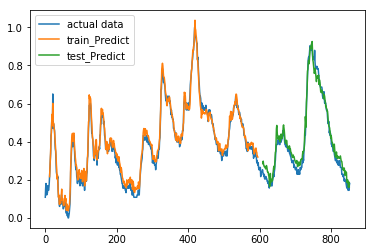

In [52]:
plt.plot(dataframe1,label="actual data")
plt.plot(trainPredictPlot, label="train_Predict")
plt.plot(testPredictPlot,label="test_Predict")
plt.legend()
plt.show()

# Plot of the predictions using the test data in scaled coordinate

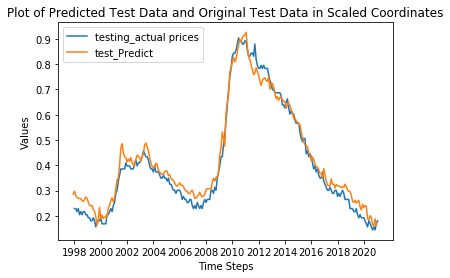

In [53]:
plt.plot([i for i in range(610,853)],dataframe1[610:,],
         label="testing_actual prices")
plt.plot(testPredictPlot,label="test_Predict")
plt.title('Plot of Predicted Test Data and Original Test Data in Scaled Coordinates')
plt.xlabel('Time Steps')
plt.ylabel('Values')

xpos=[i for i in range(610,853,21)]

plt.xticks(xpos,[1998+(i*2) for i in range(len(xpos))])
plt.legend()
plt.show()


In [54]:
from sklearn.metrics import mean_squared_error
trainPredict_inv = scaler.inverse_transform(trainPredict)
trainY_inv = scaler.inverse_transform([trainY])
testPredict_inv = scaler.inverse_transform(testPredict)
testY_inv = scaler.inverse_transform([testY])
data=dataframe[['UNRATE']]
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inv[0], trainPredict_inv[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_inv[0], testPredict_inv[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.23 RMSE
Test Score: 0.31 RMSE


In [55]:
mean_squared_error(testY_inv[0],testPredict_inv[:,0])

0.09344919149429523

In [56]:
from sklearn.metrics import mean_absolute_error


# Now we plot the predictions derived using the train and test data
# in the original coordinate

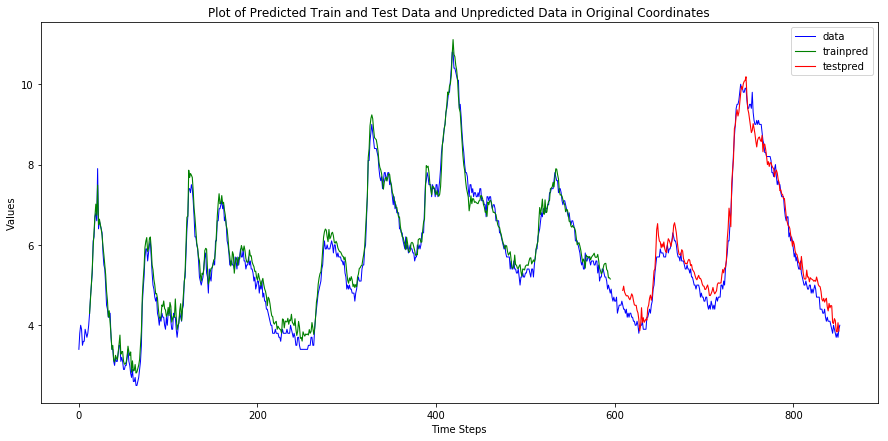

In [58]:
ItrainPredictPlot = np.empty_like(dataframe1)
ItrainPredictPlot[:, :] = np.nan    # Note that points with nan value are not plotted by matplotlib
ItrainPredictPlot[look_back:len(trainPredict_inv)+look_back, :] = trainPredict_inv
# shift test predictions for plotting
ItestPredictPlot = np.empty_like(data)
ItestPredictPlot[:, :] = np.nan
ItestPredictPlot[len(trainPredict_inv)+(look_back*2)+1:len(data)-1, :] = testPredict_inv

# plot baseline and predictions
plt.figure(figsize=(15,7))
linewidth=1
dstep=10
plt.plot(data.values,'b',label='data',linewidth=linewidth)
plt.plot(ItrainPredictPlot,'g',label='trainpred',linewidth=linewidth+0.1)
plt.plot(ItestPredictPlot,'r',label='testpred',linewidth=linewidth+0.1)
plt.title('Plot of Predicted Train and Test Data and Unpredicted Data in Original Coordinates')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()

## We plot only the testpredict against the actual (Predictions using the test set against
## the actual value)

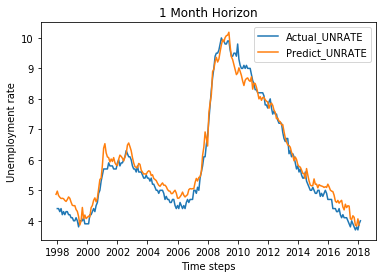

In [59]:
plt.plot([i for i in range(610,853)],data.values[610:,],
         label="Actual_UNRATE")
plt.plot(ItestPredictPlot,label="Predict_UNRATE")
plt.legend()
plt.title('1 Month Horizon')
plt.xlabel('Time steps')
plt.ylabel('Unemployment rate')
xpos=[i for i in range(610,853,24)]
plt.xticks(xpos,[1998+(i*2) for i in range(len(xpos))])
plt.legend()
plt.savefig("1 Month Horizon LSTM(NEW111).eps", format='eps', dpi=1000)
plt.show()
plt.show()


In [60]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Calculation of the Mean Absolute Percentage Error for the test Data

In [61]:
mean_absolute_percentage_error(testY_inv[0],testPredict_inv[:,0])

4.927086044707398

## Calculation of the Mean Absolute  Error for the test Data

In [62]:
mean_absolute_error(testY_inv[0],testPredict_inv[:,0])

0.25924860440163944

## Calculation of the Root Mean Square Error Error for the test Data

In [63]:
testScore = math.sqrt(mean_squared_error(testY_inv[0], testPredict_inv[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.31 RMSE


In [ ]:
L=range(610,853,21)
print (L)

In [ ]:
NN=[i for i in range(610,853,21)]
NN


In [ ]:
len(NN)

In [ ]:
BB=(NN,[1998+(i*2) for i in range(len(NN)-1)])

In [ ]:
BB